In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df_hrs = pdf_19= pd.read_excel("https://raw.githubusercontent.com/eglouberman/Is-the-MLB-juiced-/master/Data/total_hrs.csv.xlsx")

In [0]:
df_hrs.columns

Index(['American League', 'National League', 'A.L. + N.L.', 'Year'], dtype='object')

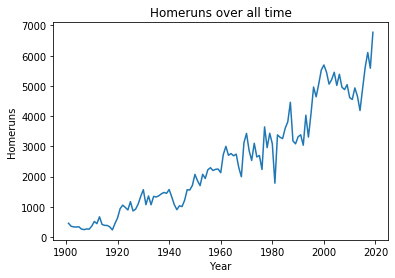

In [0]:
plt.plot(df_hrs["Year"], df_hrs["A.L. + N.L."])
plt.title("Homeruns over all time")
plt.xlabel("Year")
plt.ylabel("Homeruns")
plt.savefig("all_homeruns_over_time.png")
plt.show()

In [0]:
df_hrs["prev_hr"] =pd.Series(df_hrs["A.L. + N.L."]).shift(-1)

In [0]:
df_hrs["deltas"] = df_hrs["A.L. + N.L."] - df_hrs["prev_hr"]

In [0]:
df_hrs["deltas"]

0        99.0
1        21.0
2         4.0
3        -7.0
4        75.0
        ...  
114    -701.0
115    -495.0
116     520.0
117   -1191.0
118       NaN
Name: deltas, Length: 119, dtype: float64

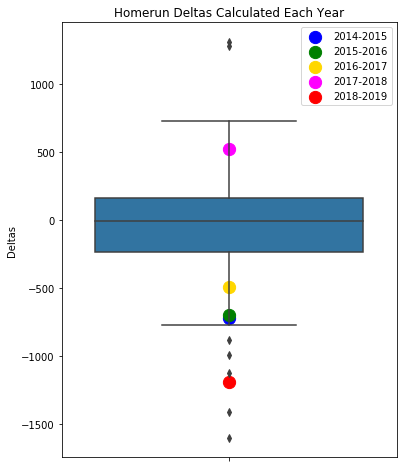

In [0]:
from matplotlib.colors import ListedColormap
classes = list(df_hrs["Year"][-5:].values)
plt.figure(figsize=(6,8))
sns.boxplot(y =df_hrs["deltas"][:-5])
size = 150
plt.scatter(x = [0], y = df_hrs["deltas"][-6:-5], color= "blue", label = "2014-2015", s= size)
plt.scatter(x = [0], y = df_hrs["deltas"][-5:-4], color= "green", label = "2015-2016", s= size)
plt.scatter(x = [0], y = df_hrs["deltas"][-4:-3], color= "gold", label = "2016-2017", s= size)
plt.scatter(x = [0], y = df_hrs["deltas"][-3:-2], color= "magenta", label = "2017-2018", s =size)
plt.scatter(x = [0], y = df_hrs["deltas"][-2:-1], color= "red", label = "2018-2019", s = size)
plt.legend()
plt.ylabel("Deltas")
plt.title("Homerun Deltas Calculated Each Year")
plt.savefig("homerun_deltas.png")
plt.show()

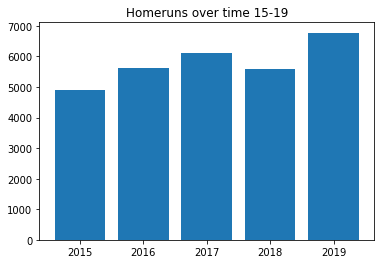

In [0]:
plt.bar(x = df_hrs["Year"][-5:].values,height = df_hrs["A.L. + N.L."][-5:].values)
plt.title("Homeruns over time 15-19")
plt.savefig("homeruns_over_time15_19.png")

# Reading Home Run Data from baseball savant

In [0]:
df_12 = pd.read_csv("https://raw.githubusercontent.com/eglouberman/Is-the-MLB-juiced-/master/Data/savant_data_12.csv")
df_13 = pd.read_csv("https://raw.githubusercontent.com/eglouberman/Is-the-MLB-juiced-/master/Data/savant_data_13.csv")
df_14 = pd.read_csv("https://raw.githubusercontent.com/eglouberman/Is-the-MLB-juiced-/master/Data/savant_data_14.csv")
df_15 = pd.read_csv("https://raw.githubusercontent.com/eglouberman/Is-the-MLB-juiced-/master/Data/savant_data_15.csv")
df_16 = pd.read_csv("https://raw.githubusercontent.com/eglouberman/Is-the-MLB-juiced-/master/Data/savant_data_16.csv")
df_17 = pd.read_csv("https://raw.githubusercontent.com/eglouberman/Is-the-MLB-juiced-/master/Data/savant_data_17.csv")
df_18 = pd.read_csv("https://raw.githubusercontent.com/eglouberman/Is-the-MLB-juiced-/master/Data/savant_data_18.csv")
df_19 = pd.read_csv("https://raw.githubusercontent.com/eglouberman/Is-the-MLB-juiced-/master/Data/savant_data_19.csv")

In [0]:
df_19.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

Below, we can see the type of data that are within each column.
What is the data we are looking at? We have captured all home run events

In [0]:
df_list = [df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19]

In [0]:
df_19.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,...,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,FF,2019-09-29,91.4,3.2415,5.8139,Grant Dayton,642086,594795,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,1.0,Dominic Smith homers (11) on a fly ball to rig...,R,L,L,NYM,ATL,X,NaN,fly_ball,1,0,2019,0.7561,1.9033,-0.3072,3.1551,NaN,641645.0,501571.0,2,11,Bot,216.49,38.44,NaN,...,-9.0325,3.371,1.535,390.0,97.3,25.6,90.832,2383.0,6.302,566070,594795,465041.0,663586.0,645277.0,588751.0,621020.0,594807.0,571740.0,542364.0,54.1978,0.382,0.593,2.0,1,0,3,5,93,2,4-Seam Fastball,4,6,4,6,6,4,4,6,Strategic,Standard
1,FF,2019-09-29,93.5,-2.1276,6.2112,Walker Lockett,594807,621141,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,5.0,Adam Duvall homers (10) on a fly ball to left ...,R,R,R,NYM,ATL,X,NaN,fly_ball,0,0,2019,-0.1703,0.9248,-0.2433,2.3995,NaN,NaN,NaN,1,11,Top,49.34,36.40,NaN,...,-19.7612,3.410,1.630,423.0,104.9,25.2,92.676,2507.0,6.014,566070,621141,621512.0,642086.0,605412.0,641645.0,642708.0,434658.0,624424.0,664059.0,54.4850,0.926,1.775,2.0,1,0,3,6,85,1,4-Seam Fastball,4,5,5,4,5,4,5,4,Infield shift,Standard
2,CU,2019-09-29,79.6,-1.9574,6.2977,Walker Lockett,588751,621141,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,2.0,Adeiny Hechavarria homers (9) on a fly ball to...,R,R,R,NYM,ATL,X,NaN,fly_ball,3,2,2019,0.9823,-0.8014,-0.0701,2.9101,NaN,NaN,NaN,1,11,Top,26.01,53.19,NaN,...,-39.6499,3.270,1.540,415.0,101.4,31.1,78.777,2699.0,5.855,566070,621141,621512.0,642086.0,605412.0,641645.0,642708.0,434658.0,624424.0,664059.0,54.6449,0.624,1.235,2.0,1,0,3,6,84,7,Curveball,4,4,4,4,4,4,4,4,Standard,Standard
3,FF,2019-09-29,97.0,-1.9275,6.1780,Kelvin Herrera,500135,516969,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Ronny Rodriguez homers (14) on a fly ball to l...,R,R,R,CWS,DET,X,NaN,fly_ball,3,2,2019,-0.1244,1.2943,-0.6814,2.3918,NaN,NaN,NaN,1,9,Top,29.02,74.29,NaN,...,-13.7964,3.280,1.570,371.0,100.2,26.2,96.267,2252.0,5.784,567343,516969,641470.0,572365.0,570560.0,660162.0,664901.0,650391.0,641553.0,641477.0,54.7150,0.637,1.116,2.0,1,0,3,6,64,6,4-Seam Fastball,5,2,2,5,2,5,2,5,Standard,Standard
4,FF,2019-09-29,93.1,-1.2635,5.3810,Brad Peacock,642136,502748,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,3.0,Matt Thaiss homers (8) on a fly ball to right ...,R,L,R,LAA,HOU,X,NaN,fly_ball,3,2,2019,-0.8004,1.4717,0.2781,2.9518,NaN,NaN,621493.0,2,6,Bot,225.56,58.06,NaN,...,-13.8415,3.180,1.570,405.0,101.9,28.7,92.266,2305.0,5.897,564814,502748,455117.0,649557.0,664702.0,647351.0,608686.0,596117.0,545350.0,663656.0,54.6029,0.724,1.414,2.0,1,0,3,6,59,10,4-Seam Fastball,1,8,1,8,8,1,1,8,Infield shift,Standard


In [0]:
df_17["launch_angle"].mean()

28.074868938401128

## Batting Metrics
Let's explore some batting metrics. lower launch angle = ball travelling further. That is why it makes sense to see 2019 having more home runs hit in the 20-30 degree range.

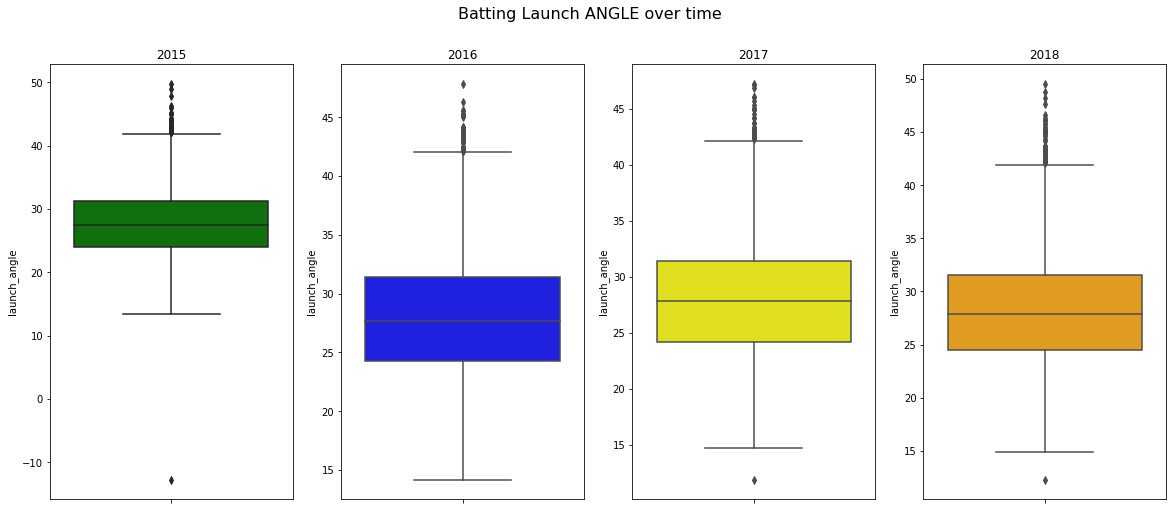

In [0]:
colors = ["green", "blue", "yellow", "orange", "red", "purple", "pink", "gray", "brown"]
i = 0
plt.figure(figsize= (20,8))
for df in df_list[3:]:
  try:
    plt.subplot(1,4,i+1)
    #plt.hist(df["launch_angle"], alpha = 0.7, color = colors[i], label = str(int(i) + 2012))
    sns.boxplot(y = "launch_angle", data = df, color = colors[i])
    plt.title(str(int(i+3) + 2012))
  except:
    pass
  i +=1

plt.suptitle("Batting Launch ANGLE over time", fontsize= 16)
plt.savefig("Batting Launch ANGLE over time")
plt.show()
#plt.hist(df_14["launch_angle"], alpha = 0.8, color = "yellow", label = "2014")

So it looks like nothing really has changed here from pre 2017 onwards... The  boxplot distribution is about the same (launch angles fall within 25-30 degrees on average each year). 

Okay, so what about launch speed? If the balls are going out faster on homerun hits, then either the players are stronger (unlikely), the pitchers are worse, the players are making better contact, or JUICED BALLS

In [0]:
% matplotlib inline
colors = ["green", "blue", "yellow", "orange", "red", "purple", "pink", "gray", "brown"]
i = 0

plt.figure(figsize= (20,8))
for df in df_list[3:]:
  try:
    plt.subplot(1,4,i+1, sharey = ax1)
    #plt.hist(df["launch_angle"], alpha = 0.7, color = colors[i], label = str(int(i) + 2012))
    sns.boxplot(y = "launch_speed", data = df, color = colors[i])
    plt.title(str(int(i+3) + 2012))
  except:
    pass
  i +=1
plt.suptitle("Launch SPEED over time", fontsize= 16)
plt.savefig("Launch SPEED over time")
plt.show()

<Figure size 1440x576 with 0 Axes>

Ok, so everything looks the same here too. Not enough evidence to say that players are doing better over these years.

## Pitching metrics
Has pitching gotten worse over time? 

In [0]:
pdf_15 = pd.read_csv("https://raw.githubusercontent.com/eglouberman/Is-the-MLB-juiced-/master/Data/baseball2015.csv")
pdf_16 = pd.read_csv("https://raw.githubusercontent.com/eglouberman/Is-the-MLB-juiced-/master/Data/baseball2016.csv")
pdf_17 = pd.read_csv("https://raw.githubusercontent.com/eglouberman/Is-the-MLB-juiced-/master/Data/baseball2017.csv")
pdf_18 = pd.read_csv("https://raw.githubusercontent.com/eglouberman/Is-the-MLB-juiced-/master/Data/baseball2018.csv")
pdf_19= pd.read_csv("https://raw.githubusercontent.com/eglouberman/Is-the-MLB-juiced-/master/Data/baseball2019.csv")


In [0]:
pdfs = [pdf_15, pdf_16, pdf_17, pdf_18, pdf_19]

In [0]:
pdf_15.columns

Index(['pitches', 'player_id', 'player_name', 'total_pitches', 'pitch_percent',
       'ba', 'iso', 'babip', 'slg', 'woba', 'xwoba', 'xba', 'hits', 'abs',
       'launch_speed', 'launch_angle', 'spin_rate', 'velocity',
       'effective_speed', 'whiffs', 'swings', 'takes', 'eff_min_vel',
       'release_extension', 'pos3_int_start_distance',
       'pos4_int_start_distance', 'pos5_int_start_distance',
       'pos6_int_start_distance', 'pos7_int_start_distance',
       'pos8_int_start_distance', 'pos9_int_start_distance'],
      dtype='object')

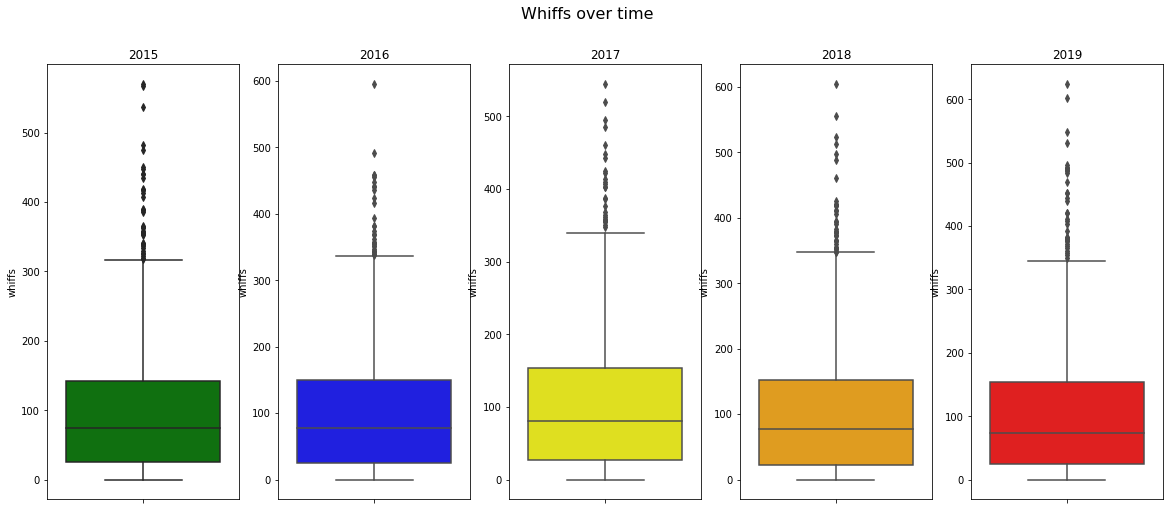

In [0]:
% matplotlib inline
colors = ["green", "blue", "yellow", "orange", "red", "purple", "pink", "gray", "brown"]
i = 0

plt.figure(figsize= (20,8))
for df in pdfs:
  plt.subplot(1,5,i+1)
  #plt.hist(df["launch_angle"], alpha = 0.7, color = colors[i], label = str(int(i) + 2012))
  sns.boxplot(y = "whiffs", data = df, color = colors[i])
  plt.title(str(int(i) + 2015))
  i +=1
plt.suptitle("Whiffs over time", fontsize= 16)
plt.savefig("Whiffs over time")
plt.show()

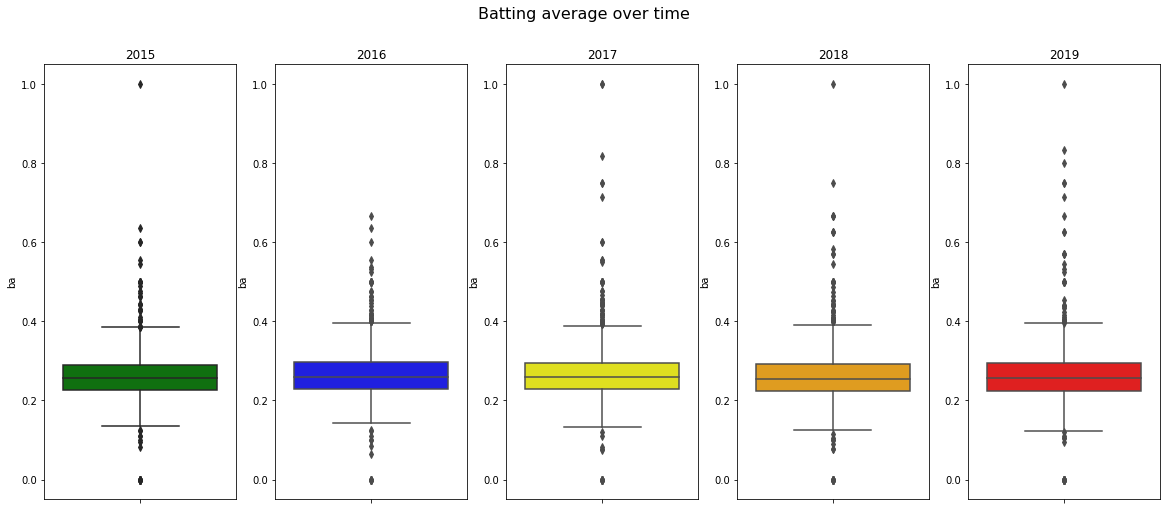

In [0]:
% matplotlib inline
import numpy as np
colors = ["green", "blue", "yellow", "orange", "red", "purple", "pink", "gray", "brown"]
i = 0

plt.figure(figsize= (20,8))
ax1 = plt.subplot(1,5,i+1)
sns.boxplot(y = "ba", data = pdfs[0], color = colors[i])
plt.clf()
for df in pdfs:
  plt.subplot(1,5,i+1, sharey = ax1)
  
  #plt.hist(df["launch_angle"], alpha = 0.7, color = colors[i], label = str(int(i) + 2012))
  sns.boxplot(y = "ba", data = df, color = colors[i])
  plt.title(str(int(i) + 2015))
  i +=1
plt.suptitle("Batting average over time", fontsize= 16)
plt.savefig("Batting average over time")
plt.show()

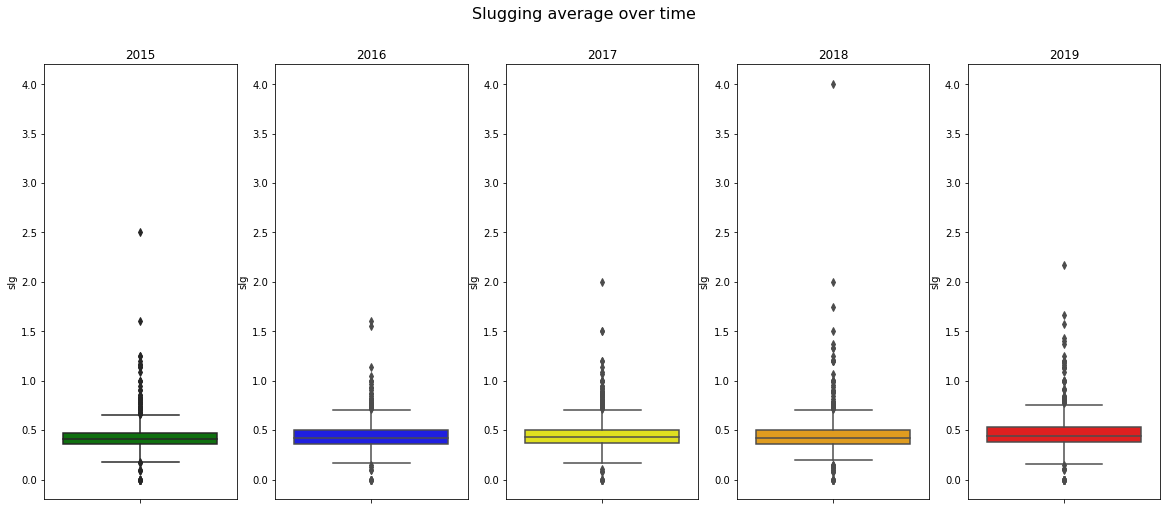

In [0]:
% matplotlib inline
import numpy as np
colors = ["green", "blue", "yellow", "orange", "red", "purple", "pink", "gray", "brown"]
i = 0

plt.figure(figsize= (20,8))
ax1 = plt.subplot(1,5,i+1)
sns.boxplot(y = "slg", data = pdfs[0], color = colors[i])
plt.clf()
for df in pdfs:
  plt.subplot(1,5,i+1, sharey = ax1)
  
  #plt.hist(df["launch_angle"], alpha = 0.7, color = colors[i], label = str(int(i) + 2012))
  sns.boxplot(y = "slg", data = df, color = colors[i])
  plt.title(str(int(i) + 2015))
  i +=1
plt.suptitle("Slugging average over time", fontsize= 16)
plt.savefig("Slugging average over time")
plt.show()

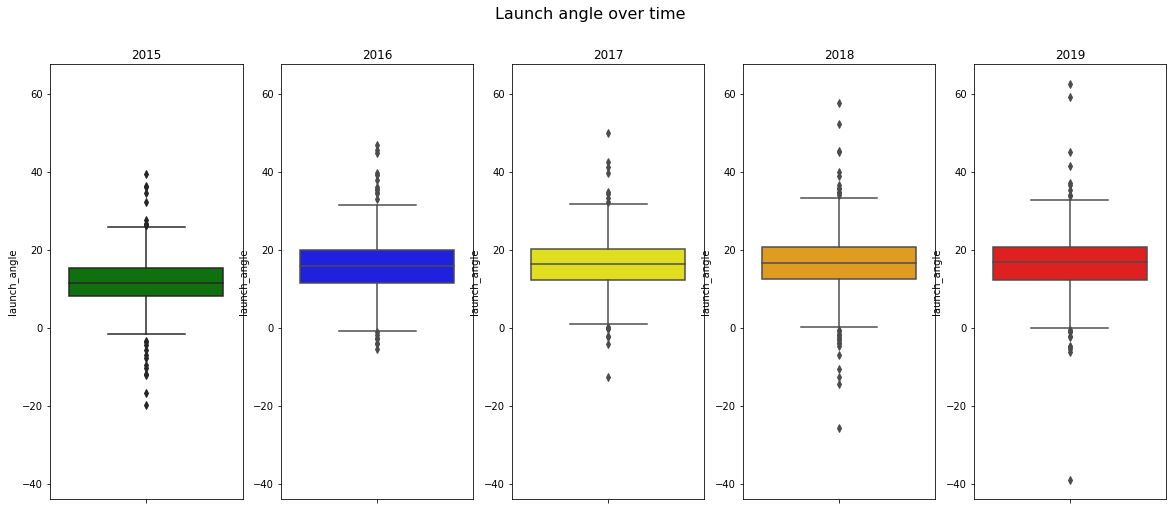

In [0]:
% matplotlib inline
import numpy as np
colors = ["green", "blue", "yellow", "orange", "red", "purple", "pink", "gray", "brown"]
i = 0

plt.figure(figsize= (20,8))
ax1 = plt.subplot(1,5,i+1)
sns.boxplot(y = "launch_angle", data = pdfs[0], color = colors[i])
plt.clf()
for df in pdfs:
  plt.subplot(1,5,i+1, sharey = ax1)
  
  #plt.hist(df["launch_angle"], alpha = 0.7, color = colors[i], label = str(int(i) + 2012))
  sns.boxplot(y = "launch_angle", data = df, color = colors[i])
  plt.title(str(int(i) + 2015))
  i +=1
plt.suptitle("Launch angle over time", fontsize= 16)
plt.savefig("Launch angle over time")
plt.show()

#Bar plot of average velocity each year

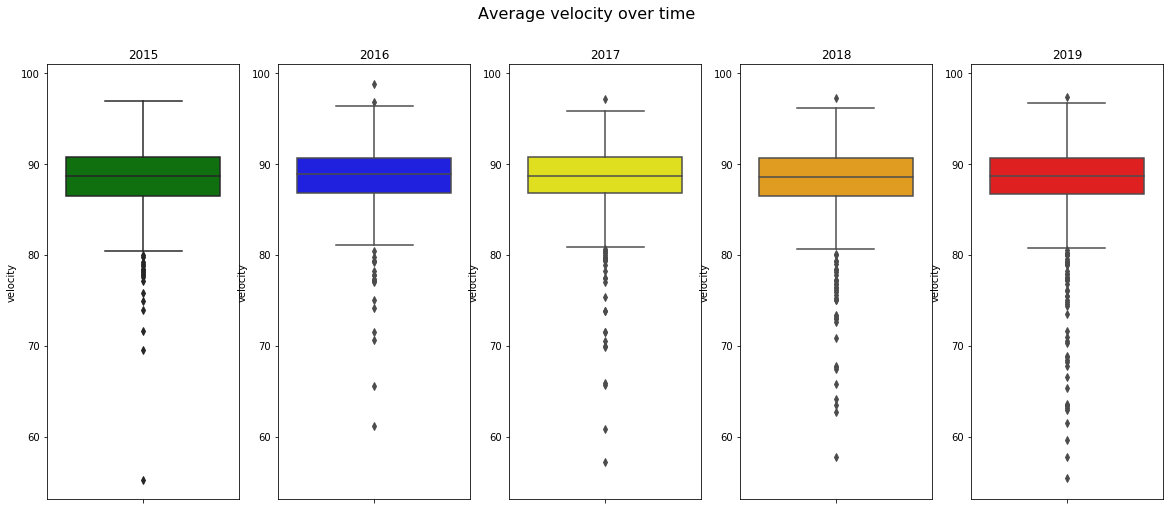

In [0]:
% matplotlib inline
import numpy as np
colors = ["green", "blue", "yellow", "orange", "red", "purple", "pink", "gray", "brown"]
i = 0

plt.figure(figsize= (20,8))
ax1 = plt.subplot(1,5,i+1)
sns.boxplot(y = "velocity", data = pdfs[0], color = colors[i])
plt.clf()
for df in pdfs:
  plt.subplot(1,5,i+1, sharey = ax1)
  
  #plt.hist(df["launch_angle"], alpha = 0.7, color = colors[i], label = str(int(i) + 2012))
  sns.boxplot(y = "velocity", data = df, color = colors[i])
  plt.title(str(int(i) + 2015))
  i +=1
plt.suptitle("Average velocity over time", fontsize= 16)
plt.savefig("Average velocity over time")
plt.show()